# Lidar Data

In this notebook, we will explore the access to lidar data at various locations and visualize them.

*Note:* The dataset structure for lidar is similar to camera, and may be skipped if you are familiar with the camera.

We first import the required modules of the library and adjust the parameters.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(0, '../src')

import numpy as np

from deepverse import ParameterManager
from deepverse import Dataset

from pprint import pprint

# Path to the MATLAB configuration file
config_path = os.path.join("../params/config.m")

# Initialize ParameterManager and load parameters
param_manager = ParameterManager(config_path)

param_manager.params['dataset_folder'] = r'D:\DeepVerse\scenarios'
param_manager.params['scenario'] = 'Town01-Carla'

# # Print the parameters
print("Loaded Parameters:")
pprint(param_manager.params)

Loaded Parameters:
{'basestations': [1],
 'camera': True,
 'camera_id': [1, 2, 3, 4, 5],
 'comm': {'OFDM': {'bandwidth': 0.05,
                   'selected_subcarriers': [0, 1],
                   'subcarriers': 512},
          'activate_RX_filter': 0,
          'bs_antenna': {'FoV': [360, 180],
                         'rotation': [5, 10, 20],
                         'shape': [32, 1],
                         'spacing': 0.5},
          'enable': True,
          'enable_Doppler': 1,
          'generate_OFDM_channels': 1,
          'num_paths': 25,
          'ue_antenna': {'FoV': [360, 180],
                         'rotation': [0, 30, 0],
                         'shape': [1, 1],
                         'spacing': 0.5}},
 'dataset_folder': 'D:\\DeepVerse\\scenarios',
 'lidar': True,
 'position': True,
 'radar': {'FMCW': {'Fs': 4000000.0,
                    'chirp_slope': 15000000000000.0,
                    'n_chirps': 256,
                    'n_samples_per_chirp': 512},
         

As it can be seen from the printed parameters, there are 2 relevant parameters to the lidar. Specifically, 
- *`lidar` parameter*: Enables if the lidar data will be included in the dataset. It is required to be `True` to be able to access to the lidar data. 
- *`scenes` parameter*: Determines which scenes to be included in the dataset. In this example, it is set to the samples $100$ and $101$. Thus, we will have only two samples available.

Let us now generate the dataset:

In [2]:
dataset = Dataset(param_manager)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.

Scene 1/2

Basestation 1


Generating channels: 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]



Scene 2/2

Basestation 1


Generating channels: 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]



Scene 1/2

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 2/2 [00:00<00:00, 1999.67it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 250.39it/s]



Scene 2/2

Basestation 1

UE-BS Channels


Generating channels: 100%|██████████| 2/2 [00:00<00:00, 1993.96it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 250.09it/s]


### Accessing Lidar Data

Let us now explore the available lidar information, including the locations, directions, etc.

#### List of Available Camera Sensors

In [7]:
lidar_dataset = dataset.get_modality('lidar')
lidar_dataset.list_sensors()

{'bs1': Sensor(id=bs1, properties={'location': [5, 10, 15], 'FoV': 360}, files=2001 files),
 'bs2': Sensor(id=bs2, properties={'location': [5, 10, 15], 'FoV': 360}, files=2001 files),
 'bs3': Sensor(id=bs3, properties={'location': [5, 10, 15], 'FoV': 360}, files=2001 files),
 'bs4': Sensor(id=bs4, properties={'location': [5, 10, 15], 'FoV': 360}, files=2001 files)}

Here, we have the information of the all lidar data listed in a dictionary. Based on the desired lidar, we can access to the relevant data.

*Note:* The `files` list the total number of available files in the dataset subdirectory corresponding to the sensor. Out of these files, however, only the relevant scenes are directly accessable in the dataset object.

Now, let us obtain samples from the lidar sensors $bs1$ and $bs2$ for the first `scene` index, $100$, as follows:

In [9]:
image_path = dataset.get_sample('lidar', device_index='bs1', index=0)
print(image_path)
image_path = dataset.get_sample('lidar', device_index='bs2', index=0)
print(image_path)

D:\DeepVerse\scenarios\Town01-Carla\lidar\bs1\100.pcd
D:\DeepVerse\scenarios\Town01-Carla\lidar\bs2\100.pcd


We can also access the devices by their order index in the camera sensor dictionary. In the printed camera dictionary above, cam3 corresponds to 4th camera. Then, we can use the following commands to access data:

In [11]:
image_path = dataset.get_sample('lidar', device_index=0, index=0)
print(image_path)
image_path = dataset.get_sample('lidar', device_index=1, index=0)
print(image_path)

D:\DeepVerse\scenarios\Town01-Carla\lidar\bs1\100.pcd
D:\DeepVerse\scenarios\Town01-Carla\lidar\bs2\100.pcd


Further, in the case we need a set of samples at different time indices together, we can access to the data using list or numpy arrays.

In [12]:
image_path = dataset.get_sample('lidar', device_index=0, index=[0, 1])
print(image_path)

['D:\\DeepVerse\\scenarios\\Town01-Carla\\lidar\\bs1\\100.pcd'
 'D:\\DeepVerse\\scenarios\\Town01-Carla\\lidar\\bs1\\101.pcd']


In [13]:
image_path = dataset.get_sample('lidar', device_index='bs1', index=[0, 1])
print(image_path)

['D:\\DeepVerse\\scenarios\\Town01-Carla\\lidar\\bs1\\100.pcd'
 'D:\\DeepVerse\\scenarios\\Town01-Carla\\lidar\\bs1\\101.pcd']


#### Visualization with DeepVerse6G

One can visualize the lidar point cloud data using the available path information and classical methods. Alternatively, we also provide built-in methods to visualize the data easily.

Let us first import the visualizer to print the available backends:

In [14]:
from deepverse.visualizers import LidarVisualizer
print(LidarVisualizer.supported_backends)


['open3d']


To visualize, however, we do not need to import. We can just set the backend, and call the dataset to visualize the sample.

*None:* Running this notebook

In [16]:
dataset.set_visualization_backend('lidar', 'open3d')
dataset.visualize('lidar', device_index=0, sample_index=0)

In this visualization, Open3D library pops up a window, and a screenshot is shown from that in the following:

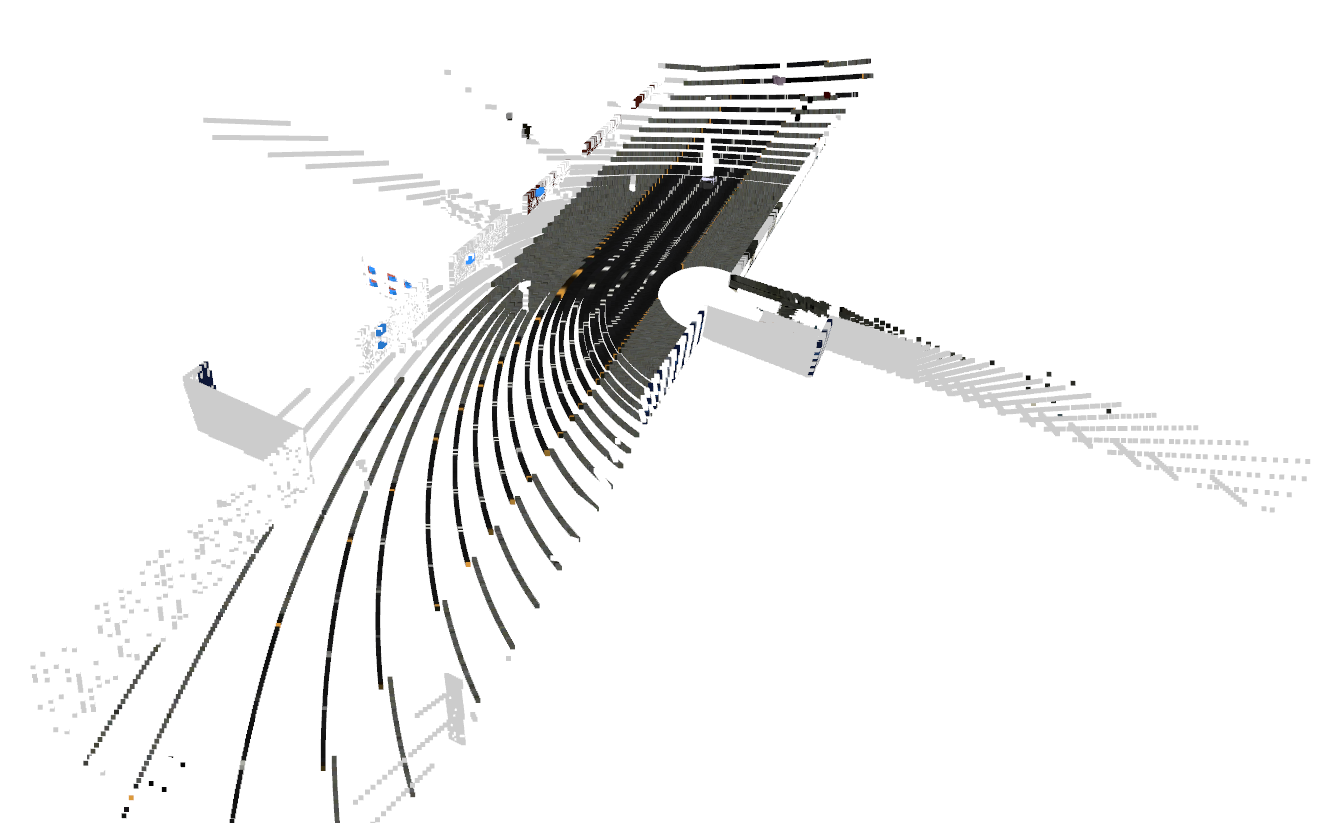
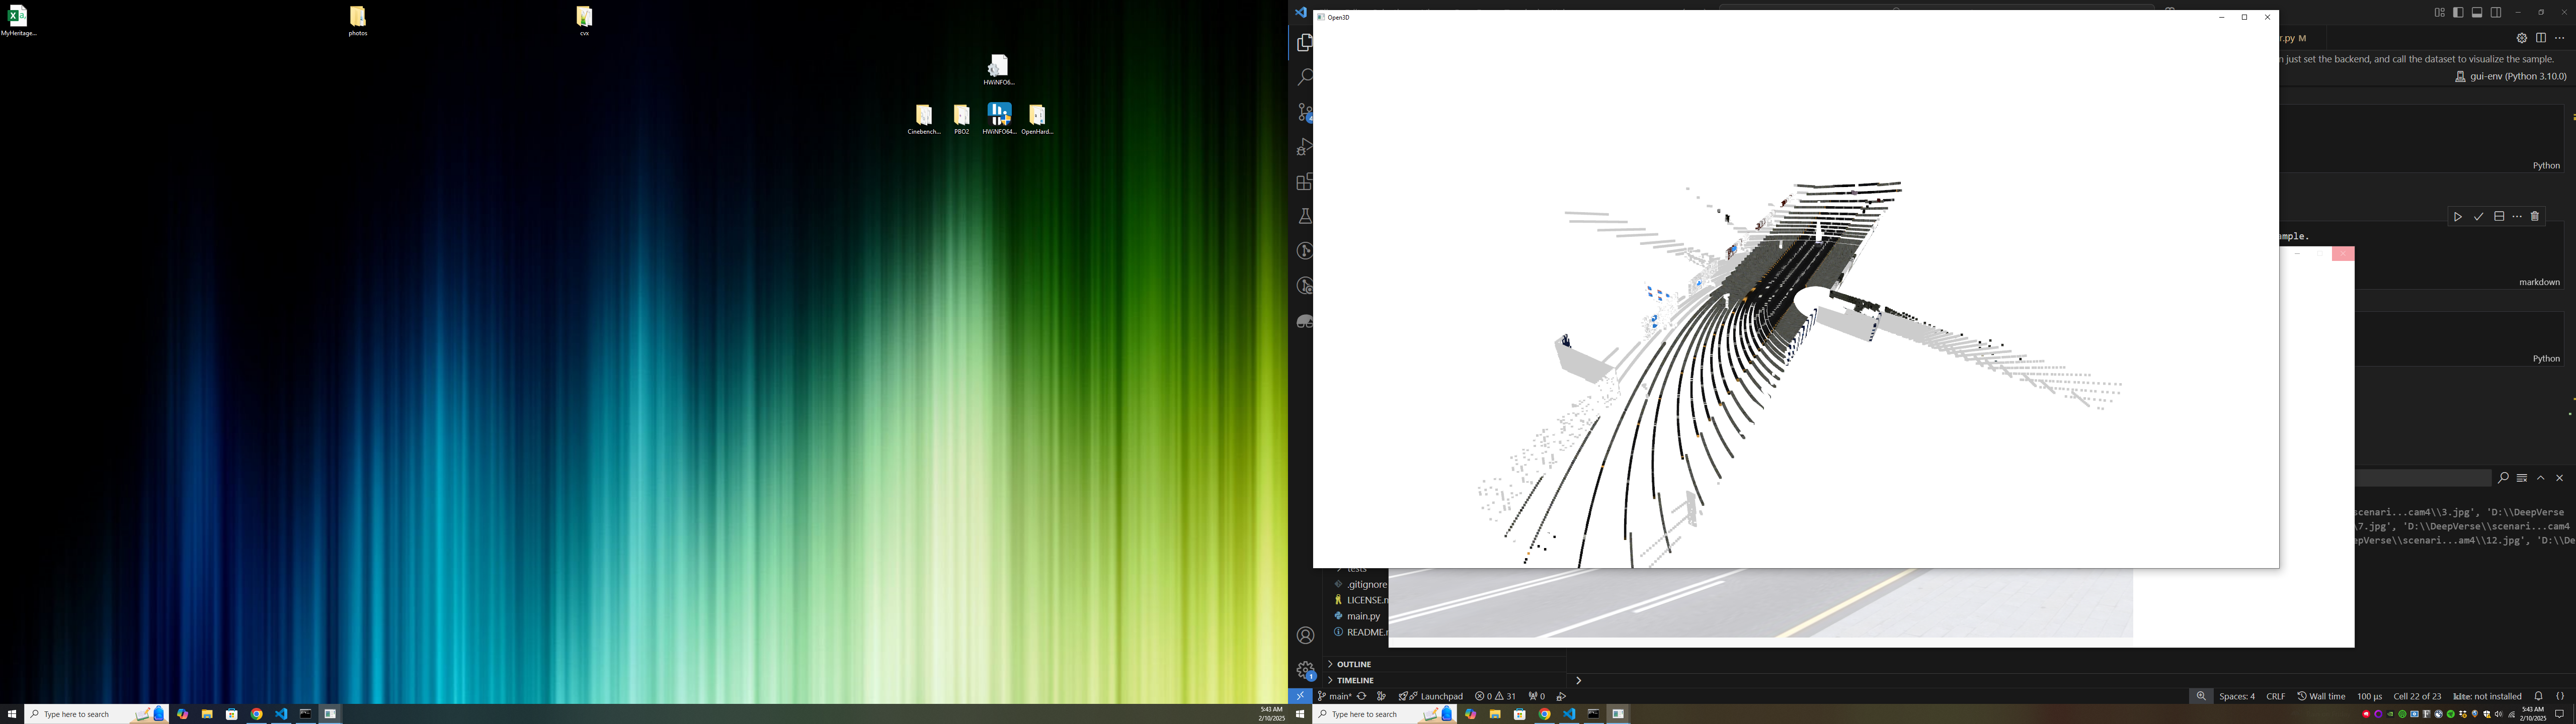